In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import logomaker as lm

In [2]:
heights_scores_df = pd.read_excel('heights_scores.xlsx')

In [3]:
heights_scores_df.head()

,chromosome,name,position,sequence,strand,Orc4 WT,"F485A,Y486A","F485Y,Y486F",N489A,Y486Q,...,R478K,N489W,WT_Score,Y486Q_Score,F485I_Score,N489A_Score,R478A_Score,F485A_Y486A_Score,F485I_Y486Q_Score,F485Y_Y486F_Score
0,chr1,ARS104.0,31002,ATTTTTAAGTTTTGT,+,0.003413,0.002510,0.003429,0.006902,0.002925,...,0.001882,0.017493,34.370372,51.645805,56.658085,73.061826,72.320658,56.206879,66.301391,37.956483
1,chr1,ARS106.0,70433,TTTTTTATGTTTAGA,-,0.009110,0.004669,0.007191,0.015777,0.008825,...,0.016224,0.059114,36.436992,51.885729,56.380679,77.187863,69.864997,53.129439,69.231213,39.539934
2,chr1,ARS107.0,124522,ATATTTAAGTCTTGA,-,0.019213,0.029398,0.017015,0.046811,0.022460,...,0.019137,0.158051,28.491761,41.864254,41.955166,54.638782,53.731351,44.530122,54.119721,30.669524
3,chr1,ARS109.0,159951,TTATTTATATTTAGT,+,0.108084,0.007605,0.094314,0.015356,0.027916,...,0.046131,0.064120,35.518618,51.000326,59.396464,78.906114,69.746828,53.350595,69.631498,39.298312
4,chr1,ARS110.0,176232,CTTTTTATGTTTTCT,+,0.175983,0.045903,0.136024,0.007306,0.102775,...,0.009325,0.020461,32.126723,53.120336,52.628486,63.106770,60.962093,60.139333,67.458532,35.443716


In [14]:
heights_scores_df.columns

Index(['chromosome', 'name', 'position', 'sequence', 'strand', 'Orc4 WT',
       'F485A,Y486A', 'F485Y,Y486F', 'N489A', 'Y486Q', 'F485I', 'F485I,Y486Q',
       'R478A', 'R478K', 'N489W', 'WT_Score', 'Y486Q_Score', 'F485I_Score',
       'N489A_Score', 'R478A_Score', 'F485A_Y486A_Score', 'F485I_Y486Q_Score',
       'F485Y_Y486F_Score'],
      dtype='object')

In [460]:
#current_mutant = 'F485I,Y486Q'
#current_mutant = 'N489W'
#current_mutant = 'R478A'
#current_mutant = 'F485I'
#current_mutant = 'N489A'
current_mutant = 'F485A,Y486A'


In [461]:
EdU_heights_and_seqs_wo_outliers = heights_scores_df.loc[(heights_scores_df['Orc4 WT'] <0.5)]

In [528]:
if current_mutant =='F485A,Y486A':
    
    mutant_threshold = 0.0012
    WT_threshold =  0.004
    
    mutant_square_df = EdU_heights_and_seqs_wo_outliers.loc[(EdU_heights_and_seqs_wo_outliers[current_mutant]>mutant_threshold) & (EdU_heights_and_seqs_wo_outliers['Orc4 WT']<WT_threshold)]
    WT_square_df = EdU_heights_and_seqs_wo_outliers.loc[(EdU_heights_and_seqs_wo_outliers[current_mutant]<mutant_threshold) & (EdU_heights_and_seqs_wo_outliers['Orc4 WT']>WT_threshold)]



if current_mutant =='F485I,Y486Q':
    
    mutant_threshold = 0.004
    WT_threshold =  0.005
    
    mutant_square_df = EdU_heights_and_seqs_wo_outliers.loc[(EdU_heights_and_seqs_wo_outliers[current_mutant]>mutant_threshold) & (EdU_heights_and_seqs_wo_outliers['Orc4 WT']<WT_threshold)]
    WT_square_df = EdU_heights_and_seqs_wo_outliers.loc[(EdU_heights_and_seqs_wo_outliers[current_mutant]<mutant_threshold) & (EdU_heights_and_seqs_wo_outliers['Orc4 WT']>WT_threshold)]
    
if current_mutant =='N489W':
    mutant_threshold = 0.03
    WT_threshold =  0.025
    mutant_square_df = EdU_heights_and_seqs_wo_outliers.loc[(EdU_heights_and_seqs_wo_outliers[current_mutant]>mutant_threshold) & (EdU_heights_and_seqs_wo_outliers['Orc4 WT']<WT_threshold)]
    WT_square_df = EdU_heights_and_seqs_wo_outliers.loc[(EdU_heights_and_seqs_wo_outliers[current_mutant]<mutant_threshold) & (EdU_heights_and_seqs_wo_outliers['Orc4 WT']>WT_threshold)]
    
if current_mutant =='R478A':
    mutant_threshold = 0.0055
    WT_threshold =  0.008
    mutant_square_df = EdU_heights_and_seqs_wo_outliers.loc[(EdU_heights_and_seqs_wo_outliers[current_mutant]>mutant_threshold) & (EdU_heights_and_seqs_wo_outliers['Orc4 WT']<WT_threshold)]
    WT_square_df = EdU_heights_and_seqs_wo_outliers.loc[(EdU_heights_and_seqs_wo_outliers[current_mutant]<mutant_threshold) & (EdU_heights_and_seqs_wo_outliers['Orc4 WT']>WT_threshold)]    
    
if current_mutant =='F485I':
    mutant_threshold = 0.006
    WT_threshold =  0.0065
    mutant_square_df = EdU_heights_and_seqs_wo_outliers.loc[(EdU_heights_and_seqs_wo_outliers[current_mutant]>mutant_threshold) & (EdU_heights_and_seqs_wo_outliers['Orc4 WT']<WT_threshold)]
    WT_square_df = EdU_heights_and_seqs_wo_outliers.loc[(EdU_heights_and_seqs_wo_outliers[current_mutant]<mutant_threshold) & (EdU_heights_and_seqs_wo_outliers['Orc4 WT']>WT_threshold)]        
    
if current_mutant =='N489A':
    mutant_threshold = 0.006
    WT_threshold =  0.005
    mutant_square_df = EdU_heights_and_seqs_wo_outliers.loc[(EdU_heights_and_seqs_wo_outliers[current_mutant]>mutant_threshold) & (EdU_heights_and_seqs_wo_outliers['Orc4 WT']<WT_threshold)]
    WT_square_df = EdU_heights_and_seqs_wo_outliers.loc[(EdU_heights_and_seqs_wo_outliers[current_mutant]<mutant_threshold) & (EdU_heights_and_seqs_wo_outliers['Orc4 WT']>WT_threshold)]            

In [529]:
len(mutant_square_df),len(WT_square_df)

(45, 14)

In [530]:
!mkdir boxes_motifs/$current_mutant

mkdir: boxes_motifs/F485A,Y486A: File exists


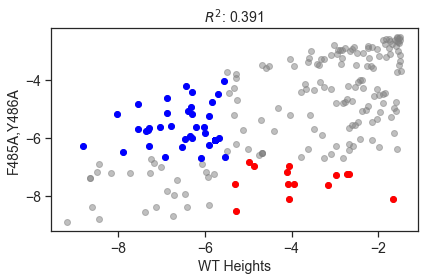

In [531]:

corr = pg.corr(np.log(EdU_heights_and_seqs_wo_outliers['Orc4 WT'].values),np.log(EdU_heights_and_seqs_wo_outliers[current_mutant].values))
rsquared = str(corr['r2'].values[0])               
plt.scatter(np.log(EdU_heights_and_seqs_wo_outliers['Orc4 WT'].values),np.log(EdU_heights_and_seqs_wo_outliers[current_mutant].values),color='gray',alpha=0.5)
plt.scatter(np.log(mutant_square_df['Orc4 WT'].values),np.log(mutant_square_df[current_mutant].values),color='blue')
plt.scatter(np.log(WT_square_df['Orc4 WT'].values),np.log(WT_square_df[current_mutant].values),color='red')
plt.title('$R^2$: '+rsquared[0:6],fontsize=14)
plt.tick_params(labelsize=14)
plt.xlabel('WT Heights',fontsize=14)
plt.ylabel(current_mutant,fontsize=14)
plt.savefig('boxes_motifs/'+current_mutant+'/'+'selected_sequences.png')
plt.tight_layout()
plt.show()



In [532]:
mutant_seqs_mat = lm.alignment_to_matrix(list(mutant_square_df['sequence'].values))
WT_seqs_mat = lm.alignment_to_matrix(list(WT_square_df['sequence'].values))

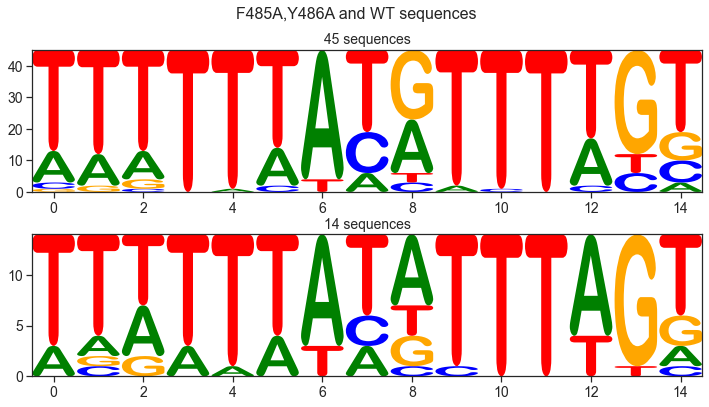

In [533]:
fig, axs = plt.subplots(2,1,figsize=(12,6))
mutant_seqs_logo = lm.Logo(mutant_seqs_mat,font_name='Arial Rounded MT Bold',ax=axs[0])
WT_seqs_logo = lm.Logo(WT_seqs_mat,font_name='Arial Rounded MT Bold',ax=axs[1])
axs[0].set_title(str(len(mutant_square_df))+' sequences',fontsize=14)
axs[1].set_title(str(len(WT_square_df))+' sequences',fontsize=14)
axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)
plt.suptitle(current_mutant+' and WT sequences',fontsize=16)
fig.subplots_adjust(hspace=0.3)
fig.savefig('boxes_motifs/'+current_mutant+'/'+current_mutant+'_logos.png')

WT_heights_df = heights_scores_df[heights_scores_df.columns[5:15]]

In [ ]:
WT_heights_df = heights_scores_df[heights_scores_df.columns[5:15]]

In [5]:
WT_heights_df.head()

,Orc4 WT,"F485A,Y486A","F485Y,Y486F",N489A,Y486Q,F485I,"F485I,Y486Q",R478A,R478K,N489W
0,0.003413,0.002510,0.003429,0.006902,0.002925,0.002896,0.003567,0.004890,0.001882,0.017493
1,0.009110,0.004669,0.007191,0.015777,0.008825,0.007296,0.006505,0.026728,0.016224,0.059114
2,0.019213,0.029398,0.017015,0.046811,0.022460,0.034355,0.034207,0.030901,0.019137,0.158051
3,0.108084,0.007605,0.094314,0.015356,0.027916,0.019724,0.005737,0.020899,0.046131,0.064120
4,0.175983,0.045903,0.136024,0.007306,0.102775,0.006356,0.007340,0.007380,0.009325,0.020461


# EdU Heights vs. Heights

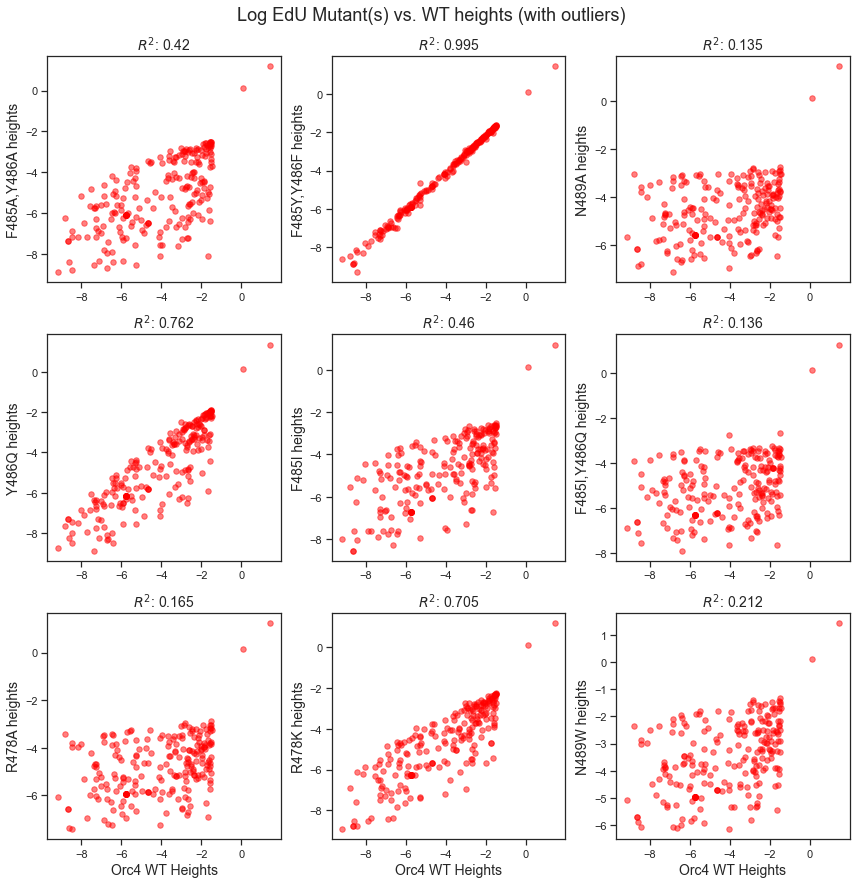

In [6]:

len(WT_heights_df.columns[1:])

num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols,figsize=(12,12))

mutant_index=1

for i in range(num_rows):
    for j in range(num_cols):
        
        if i==num_rows-1:
            axs[i,j].set_xlabel('Orc4 WT Heights',fontsize=14)
        corr = pg.corr(np.log(WT_heights_df['Orc4 WT'].values), np.log(WT_heights_df[WT_heights_df.columns[mutant_index]].values))    
        #print(corr['r2'].values,corr['p-val'].values)
        rsquared = str(corr['r2'].values[0])
        pvalue = str(corr['p-val'].values[0])
        axs[i,j].set_title('$R^2$: %s'%(rsquared),fontsize=14)
        axs[i,j].set_ylabel(WT_heights_df.columns[mutant_index]+' heights',fontsize=14)
        axs[i, j].scatter(np.log(WT_heights_df['Orc4 WT'].values), np.log(WT_heights_df[WT_heights_df.columns[mutant_index]].values),color='red',s=30,alpha=0.5)
#         axs[i,j].set_xlim(0,0.3)
#         axs[i,j].set_ylim(0,0.3)
        mutant_index+=1

#       axs[i,j].axis('off')

fig.suptitle(" Log EdU Mutant(s) vs. WT heights (with outliers)",y=1.02,fontsize=18)
fig.tight_layout()            
fig.savefig('EdU_log_heights_vs_heights_with_outliers.png',bbox_inches='tight')

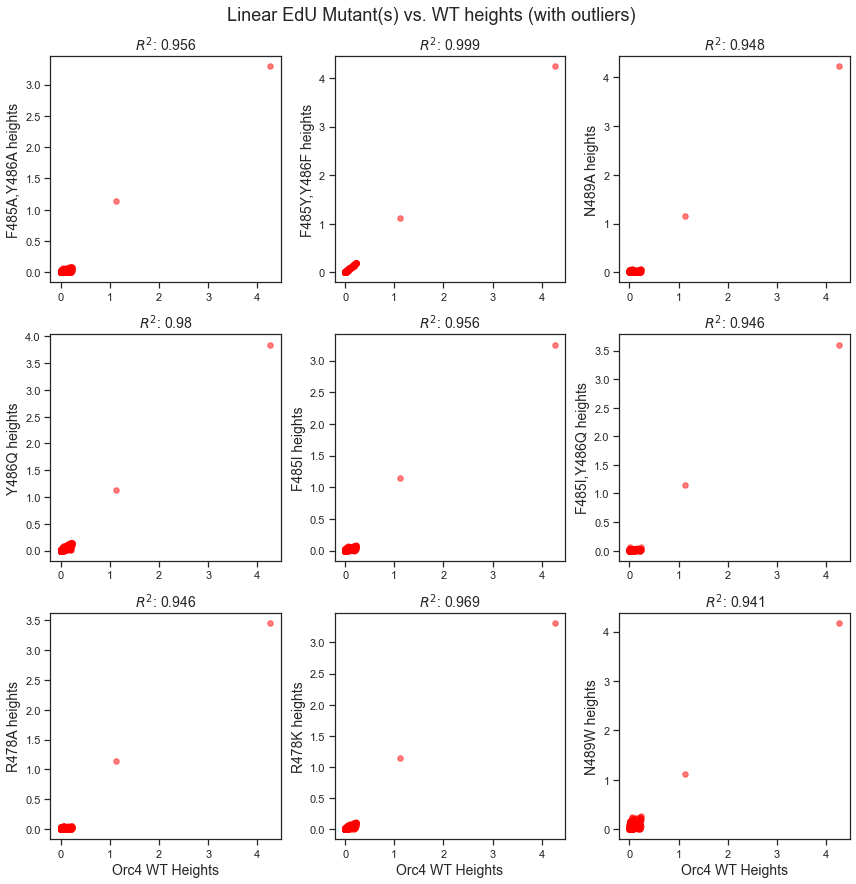

In [7]:

len(WT_heights_df.columns[1:])

num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols,figsize=(12,12))

mutant_index=1

for i in range(num_rows):
    for j in range(num_cols):
        
        if i==num_rows-1:
            axs[i,j].set_xlabel('Orc4 WT Heights',fontsize=14)
        corr = pg.corr(WT_heights_df['Orc4 WT'].values, WT_heights_df[WT_heights_df.columns[mutant_index]].values)    
        #print(corr['r2'].values,corr['p-val'].values)
        rsquared = str(corr['r2'].values[0])
        pvalue = str(corr['p-val'].values[0])
        axs[i,j].set_title('$R^2$: %s'%(rsquared),fontsize=14)
        axs[i,j].set_ylabel(WT_heights_df.columns[mutant_index]+' heights',fontsize=14)
        axs[i, j].scatter(WT_heights_df['Orc4 WT'].values, WT_heights_df[WT_heights_df.columns[mutant_index]].values,color='red',s=30,alpha=0.5)
#         axs[i,j].set_xlim(0,0.3)
#         axs[i,j].set_ylim(0,0.3)
        mutant_index+=1

#       axs[i,j].axis('off')

fig.suptitle(" Linear EdU Mutant(s) vs. WT heights (with outliers)",y=1.02,fontsize=18)
fig.tight_layout()            
fig.savefig('EdU_linear_heights_vs_heights_with_outliers.png',bbox_inches='tight')



In [8]:
#df_no_outliers = WT_heights_df.loc[(df['F485A,Y486A'] < 0.5) & (df['Orc4 WT'] < 0.5)]
WT_heights_df = WT_heights_df.loc[(WT_heights_df['F485A,Y486A'] < 0.5) & (WT_heights_df['Orc4 WT'] < 0.5)]

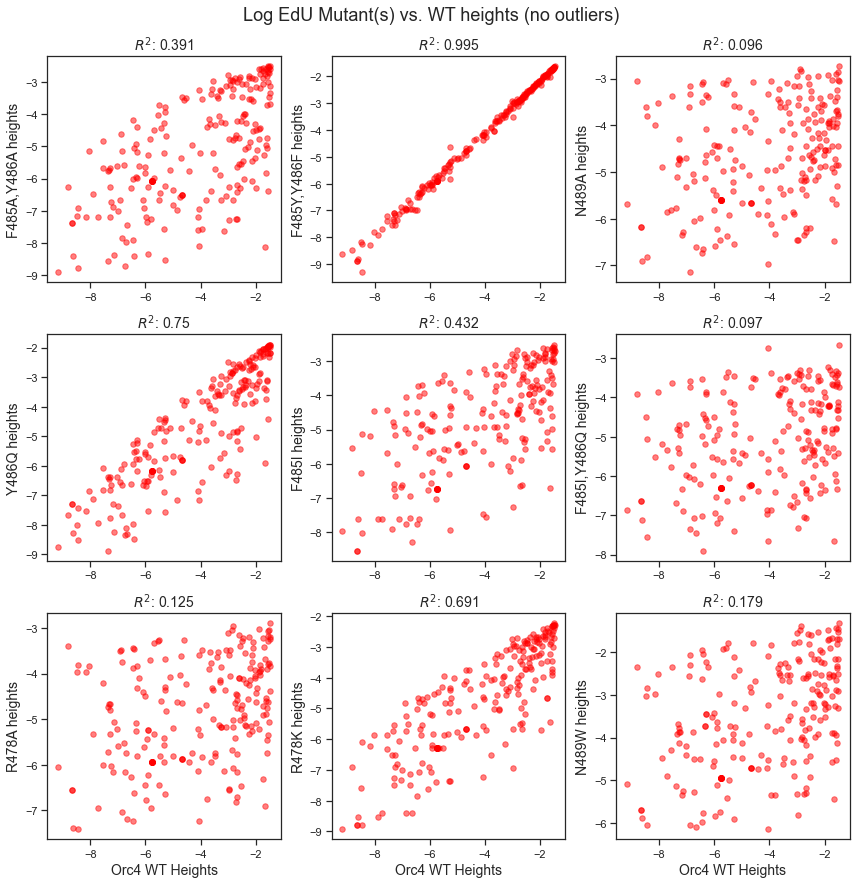

In [9]:

len(WT_heights_df.columns[1:])

num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols,figsize=(12,12))

mutant_index=1

for i in range(num_rows):
    for j in range(num_cols):
        
        if i==num_rows-1:
            axs[i,j].set_xlabel('Orc4 WT Heights',fontsize=14)
        corr = pg.corr(np.log(WT_heights_df['Orc4 WT'].values), np.log(WT_heights_df[WT_heights_df.columns[mutant_index]].values))    
        #print(corr['r2'].values,corr['p-val'].values)
        rsquared = str(corr['r2'].values[0])
        pvalue = str(corr['p-val'].values[0])
        axs[i,j].set_title('$R^2$: %s'%(rsquared),fontsize=14)
        axs[i,j].set_ylabel(WT_heights_df.columns[mutant_index]+' heights',fontsize=14)
        axs[i, j].scatter(np.log(WT_heights_df['Orc4 WT'].values), np.log(WT_heights_df[WT_heights_df.columns[mutant_index]].values),color='red',s=30,alpha=0.5)
#         axs[i,j].set_xlim(0,0.3)
#         axs[i,j].set_ylim(0,0.3)
        mutant_index+=1

#       axs[i,j].axis('off')

fig.suptitle(" Log EdU Mutant(s) vs. WT heights (no outliers)",y=1.02,fontsize=18)
fig.tight_layout()            
fig.savefig('EdU_log_heights_vs_heights_no_outliers.png',bbox_inches='tight')

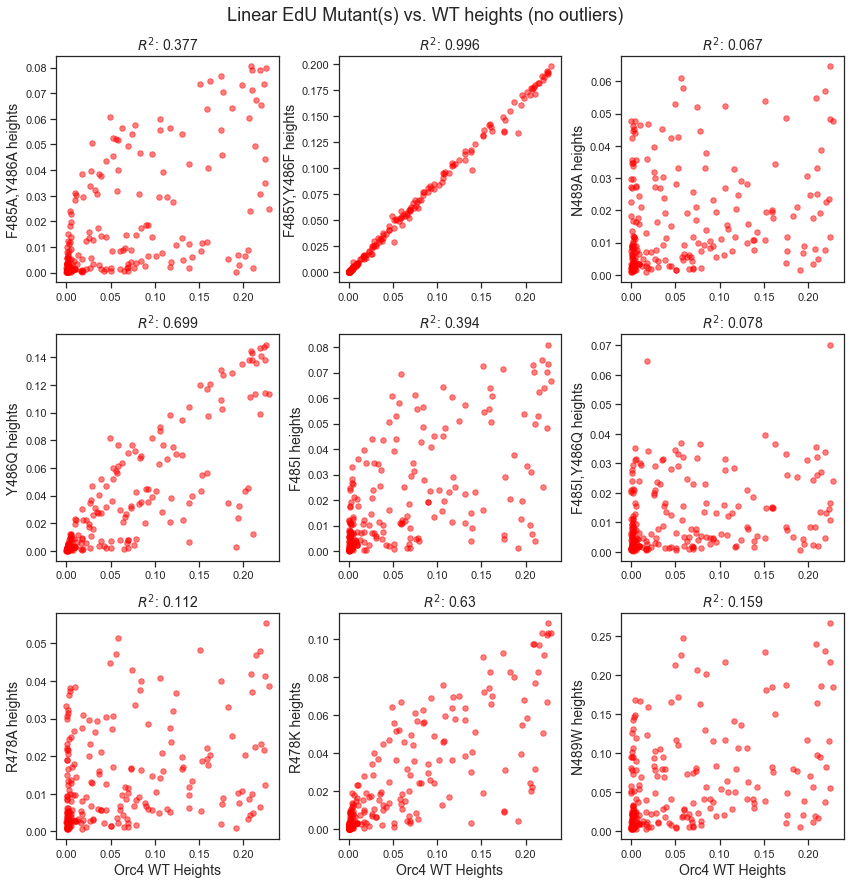

In [10]:

len(WT_heights_df.columns[1:])

num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols,figsize=(12,12))

mutant_index=1

for i in range(num_rows):
    for j in range(num_cols):
        
        if i==num_rows-1:
            axs[i,j].set_xlabel('Orc4 WT Heights',fontsize=14)
        corr = pg.corr(WT_heights_df['Orc4 WT'].values, WT_heights_df[WT_heights_df.columns[mutant_index]].values)    
        #print(corr['r2'].values,corr['p-val'].values)
        rsquared = str(corr['r2'].values[0])
        pvalue = str(corr['p-val'].values[0])
        axs[i,j].set_title('$R^2$: %s'%(rsquared),fontsize=14)
        axs[i,j].set_ylabel(WT_heights_df.columns[mutant_index]+' heights',fontsize=14)
        axs[i, j].scatter(WT_heights_df['Orc4 WT'].values, WT_heights_df[WT_heights_df.columns[mutant_index]].values,color='red',s=30,alpha=0.5)
#         axs[i,j].set_xlim(0,0.3)
#         axs[i,j].set_ylim(0,0.3)
        mutant_index+=1

#       axs[i,j].axis('off')

fig.suptitle(" Linear EdU Mutant(s) vs. WT heights (no outliers)",y=1.02,fontsize=18)
fig.tight_layout()            
fig.savefig('EdU_linear_heights_vs_heights_no_outliers.png',bbox_inches='tight')

